<a href="https://colab.research.google.com/github/wildan14ar/Calculator-with-PyQT5/blob/main/Deploy_IDCamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perkenalan

Perkenalkan nama saya Wildan Abdurrasyid seorang Mahasiswa sem 3 Institut Teknologi Tangerang Selatan.

pada proyek ini saya akan membuat Model Image Classification sederhana dari dataset yang telah saya dapatkan.

link source dataset: https://www.kaggle.com/datasets/olafkrastovski/handwritten-digits-0-9

## Import Library

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2

## Persiapan Data

In [13]:
%%capture
if not os.path.exists('archive'):
    !unzip "archive.zip" -d archive

In [14]:
os.listdir('archive')

['0', '2', '8', '9', '7', '5', '4', '3', '6', '1']

In [15]:
print('total 0 images :', len(os.listdir('archive/0')))
print('total 1 images :', len(os.listdir('archive/1')))
print('total 2 images :', len(os.listdir('archive/2')))
print('total 3 images :', len(os.listdir('archive/3')))
print('total 4 images :', len(os.listdir('archive/4')))
print('total 5 images :', len(os.listdir('archive/5')))
print('total 6 images :', len(os.listdir('archive/6')))
print('total 7 images :', len(os.listdir('archive/7')))
print('total 8 images :', len(os.listdir('archive/8')))
print('total 9 images :', len(os.listdir('archive/9')))

total 0 images : 2236
total 1 images : 2241
total 2 images : 2233
total 3 images : 2202
total 4 images : 2179
total 5 images : 2126
total 6 images : 2121
total 7 images : 2116
total 8 images : 2085
total 9 images : 2016


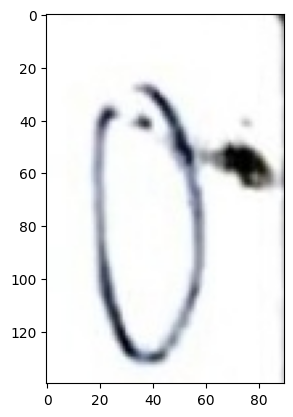

In [16]:
%matplotlib inline
img = image.load_img('archive/0/Zero_full (1).jpg')
imgplot = plt.imshow(img)

## Image Generator

In [17]:
train_dir = os.path.join('archive')
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode = 'nearest',
    validation_split=0.1) # set validation split

## Split data into training and validation sets

In [18]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation')

Found 19404 images belonging to 10 classes.
Found 2151 images belonging to 10 classes.


## Build the model

In [19]:
model = tf.keras.models.Sequential([
    ResNet152V2(weights="imagenet", include_top=False, input_tensor=Input(shape=(150, 150, 3))),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.layers[0].trainable = False

## Compile the model

In [20]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

## Fungsi Callback

In [21]:
class Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') >= 0.92 and logs.get('val_accuracy') >= 0.92:
            print("\nAkurasi mencapai 92%, pelatihan dihentikan.")
            self.model.stop_training = True

callback = Callback()

## Train the model with validation data

In [22]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=50,
                    verbose=2,
                    callbacks=[callback],
                    )

Epoch 1/50


KeyboardInterrupt: ignored

## Plot Loss dan Akurasi dari Trained Model

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()